In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) #increase the width of the IPYTHON Cells
display(HTML("<style>div.output_scroll { height:600px; !important; }</style>"))



HTML('''<script>

code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from ipywidgets import widgets, Button
from IPython.display import display, clear_output

In [4]:
%matplotlib inline

root_path = "I:/Dropbox/NDAD/Visualizing-Empire/OpeNER/Output/"
geocode_master_list_path = root_path + "geocode/location.masterlist.tsv.geocoded.csv"
kwic_list_path = root_path + "kwic/kwic-merged/kwic-cleaned/aggregate_all-years_KWIC_minimally-cleaned_2.tsv"

geocode_master_list = pd.read_csv(geocode_master_list_path)
kwic_list = pd.read_csv(kwic_list_path,sep='\t')

In [5]:
def get_lat_lon(key):
    key = int(key)
    lat = geocode_master_list.get_value(key,"LAT")
    lat_text.value = unicode(lat)
    lon = geocode_master_list.get_value(key,"LON")
    lon_text.value = unicode(lon)
    return lat,lon

def create_map(lat,lon):
    m = Basemap(projection='mill',lon_0=0)
    fig = plt.figure(figsize=(12,5))
    m.drawcoastlines(linewidth="0.1")
    x,y = m(lon,lat)
    m.plot(x, y, 'ko', markersize=10)
    plt.show()

def display_KWIC(kwic_list,term):
    term=term.lower()
    kwics = kwic_list[kwic_list['TERM']==term]
    notification.value=unicode(str(len(kwics.index))+" terms found.")
    for index,kwic in kwics.iterrows():
        try:
            kwic_split = kwic["KWIC"].split(" ")
            first_half = " ".join(kwic_split[0:14])
            keyword = kwic_split[15]
            second_half =" ".join(kwic_split[16:])
            display(HTML('<span style="width:50px;display:inline-block;font-style:italic;" id="'+str(index)+'">'+str(index)+'</span><span style="padding-left:10px;width:650px;display:inline-block;">'+first_half.decode("utf8")+'</span>'
                        +'<span style="font-weight:bold;display:inline-block;width:200px;">'+keyword.decode('utf8')+'</span><span>'+second_half.decode('utf8')+'</span>'+"<hr/>")) #print the KWIC
        except:
            print "error!"
            

def handle_submit(sender):
    clear_output()
    notification.value = unicode("")
    try:
        lat,lon = get_lat_lon(text.value)
        term = get_term(text.value)
        display(HTML('<h1>'+term.decode('utf8')+'</h1>'))
        create_map(lat,lon)
        display_KWIC(kwic_list,term)
    except:
        notification.value = unicode("Index not found")
    
def increment_text(sender):
    while int(text.value) <= len(geocode_master_list):
        text.value=unicode(int(text.value) + 1)
        try:
            print geocode_master_list.get_value(int(text.value),"LOC")
            break
        except:
            continue
    handle_submit(sender)

def decrease_text(sender):
    while int(text.value) >= 0:
        text.value=unicode(int(text.value) - 1)
        try:
            print geocode_master_list.get_value(int(text.value),"LOC")
            break
        except:
            continue
    handle_submit(sender)
        
def export_clicked(sender):
    geocode_master_list.to_csv(root_path+"geocode_master_cleaned.csv",index=False)
    kwic_list.to_csv(root_path+"kwic_list_cleaned.tsv",sep="\t",index=False)
    notification.value = unicode("Geocode Master List and KWIC List Exported")

def delete_clicked(sender):
    term = get_term(text.value)
    global kwic_list,geocode_master_list
    kwic_list = kwic_list[kwic_list['TERM']!=term]
    geocode_master_list = geocode_master_list[geocode_master_list['LOC']!=term]
    notification.value = unicode(term + " deleted from data frames.")
    
def get_term(key):
    key = int(key)
    return geocode_master_list.get_value(key,"LOC")

def change_coords(sender):
    geocode_master_list.loc[int(text.value),"LAT"] = float(lat_text.value)
    geocode_master_list.loc[int(text.value),"LON"] = float(lon_text.value)
    notification.value = unicode("Coordinates Changed!")
    
def search_terms(sender):
    geocode_master_list.loc[int(text.value),"LAT"] = float(lat_text.value)
    geocode_master_list.loc[int(text.value),"LON"] = float(lon_text.value)
    notification.value = unicode("Coordinates Changed!")
    
def return_index(sender):
    try:
        mask = geocode_master_list["LOC"].str.match(term_search.value, case=False,na=False)
        index = geocode_master_list[mask].index.values[0]
#       index = geocode_master_list[geocode_master_list["LOC"]==term_search.value].index.values[0]
        text.value=unicode(index)
        handle_submit(sender)
    except:
        notification.value = unicode("Not found!")

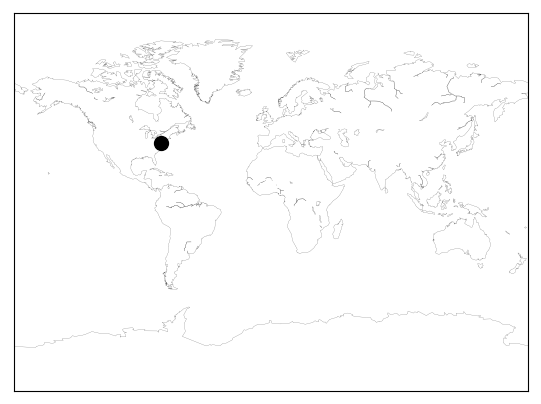

In [6]:
text = widgets.Text(value="0",width="120px")
submit = widgets.Button(description="Submit",width="70px")
next_button = widgets.Button(description=">>",width="40px",id="prev")
prev_button = widgets.Button(description="<<",width="40px")
delete = widgets.Button(description="Delete All",width="60px")
export = widgets.Button(description="Export",width="60px")


coords_button = widgets.Button(description="ChangeCoords",width="120px")
lat_text = widgets.Text(width="200px",description="Lat")
lon_text = widgets.Text(width="200px",description="Lon")
notification = widgets.Label()
term_search=widgets.Text(value="",width="240px",description="\t ")
term_search_button=widgets.Button(value="",width="70px",description="Search")

display(widgets.HBox((prev_button,next_button,text,submit,delete,export,lat_text,lon_text,coords_button,term_search,term_search_button)))
display(notification)

text.on_submit(handle_submit)
submit.on_click(handle_submit)
next_button.on_click(increment_text)
prev_button.on_click(decrease_text)
export.on_click(export_clicked)
delete.on_click(delete_clicked)
coords_button.on_click(change_coords)
term_search_button.on_click(return_index)
term_search.on_submit(return_index)

notification.value = unicode("Click Submit to Begin!")